# SD212: Graph mining
## Lab 4: PageRank

In this lab, you will learn how to compute, use and interpret various PageRank metrics.

## Import

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
from scipy import sparse as sp

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt

In [6]:
from pprint import pprint

**Note:** The following magic command provides interactive plots (e.g., for zooming in/out).<br>
Any new figure must by declared by the command ```plt.figure()```

In [7]:
# %matplotlib inline
# %matplotlib notebook

## Data

You will need the following datasets (the same as in previous labs, no need to download them again):
* [Les Misérables](http://perso.telecom-paristech.fr/~bonald/graphs/miserables.graphml.gz)<br>  Graph connecting the characters of the [novel of Victor Hugo](https://fr.wikisource.org/wiki/Les_Misérables) when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together. 
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools)
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).



## 1. PageRank

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution uniform over the set of nodes.

## Toy graph

Consider the following graph:

In [8]:
toy_graph = nx.DiGraph()
edgelist = [(7, 5), (5, 3), (3, 7), (4, 5), (4, 6), (7, 4), (1, 6), (9, 8), (7, 8), (6, 1), (2, 9), (8, 2)]
toy_graph.add_edges_from(edgelist)

In [9]:
plt.figure()
nx.draw(toy_graph, with_labels = True)

## To do

* Guess the best ranked node of this graph.
* Check the PageRank of each node using the```pagerank``` function of ```networkx``` and interpret the results.
* Add edges 2->5 and 6->3 and observe the impact on the top-3 nodes.


It looks like the nodes $6, 8$ and $5$ are the best ranked.

In [10]:
import operator

In [11]:
initial_ranks = nx.pagerank(toy_graph)
pprint(sorted(initial_ranks.items(), key = operator.itemgetter(1), reverse=True))

[(6, 0.16603807389373965),
 (8, 0.16086300246509883),
 (1, 0.1578013863403067),
 (2, 0.15340048063270742),
 (9, 0.1470581226968908),
 (7, 0.06775849722262377),
 (3, 0.060108035941243115),
 (5, 0.05110749325856301),
 (4, 0.03586490754882651)]


In [12]:
modified_toy_graph = toy_graph.copy()
modified_toy_graph.add_edges_from([(2, 5), (6, 3)])

plt.figure()
nx.draw(modified_toy_graph, with_labels=True)

In [13]:
modified_ranks = nx.pagerank(modified_toy_graph)
pprint(sorted(modified_ranks.items(), key = operator.itemgetter(1), reverse=True))

[(3, 0.1754230695911956),
 (7, 0.16577642307830376),
 (5, 0.1414647348577573),
 (8, 0.1209687215133555),
 (2, 0.11949146088380552),
 (6, 0.09061278609150875),
 (9, 0.06744956317842467),
 (4, 0.06363615072841398),
 (1, 0.055177090077234855)]


## Path graph

Now consider a path graph:

In [14]:
n = 10
path_graph = nx.path_graph(n)
pos = [(i,0) for i in range(n)]

In [15]:
plt.figure(figsize=(5,1))
nx.draw(path_graph,pos,with_labels = True)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$?

In [16]:
sorted_ranks_path_graph = sorted(nx.pagerank(path_graph, alpha=0.85).items(), key=operator.itemgetter(1), reverse=True)
pprint(sorted_ranks_path_graph)

[(1, 0.1161980205543576),
 (8, 0.1161980205543576),
 (2, 0.10934610989479174),
 (7, 0.10934610989479172),
 (3, 0.10579068620906135),
 (6, 0.10579068620906133),
 (5, 0.10428043095435947),
 (4, 0.10428043095435946),
 (0, 0.06438475238742992),
 (9, 0.06438475238742991)]


In [17]:
sorted_ranks_path_graph = sorted(nx.pagerank(path_graph, alpha=0.55).items(), key=operator.itemgetter(1), reverse=True)
pprint(sorted_ranks_path_graph)

[(1, 0.11615179177697722),
 (8, 0.11615179177697721),
 (2, 0.10485177721707103),
 (7, 0.10485177721707103),
 (3, 0.10148932120829791),
 (6, 0.10148932120829791),
 (4, 0.10056505843385696),
 (5, 0.10056505843385696),
 (0, 0.07694205136379692),
 (9, 0.07694205136379692)]


In [18]:
sorted_ranks_path_graph = sorted(nx.pagerank(path_graph, alpha=0.25).items(), key=operator.itemgetter(1), reverse=True)
pprint(sorted_ranks_path_graph)

[(1, 0.10983859896659853),
 (8, 0.10983859896659853),
 (2, 0.10124977827072146),
 (7, 0.10124977827072146),
 (3, 0.1001590132713318),
 (6, 0.1001590132713318),
 (4, 0.10002273321151735),
 (5, 0.10002273321151735),
 (0, 0.08872987627983095),
 (9, 0.08872987627983095)]


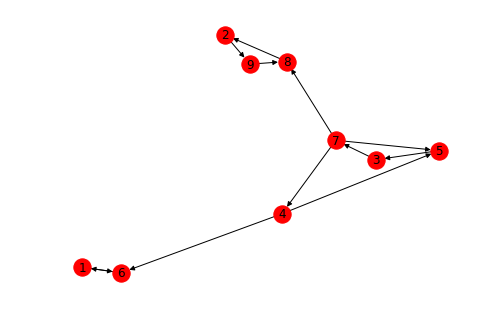

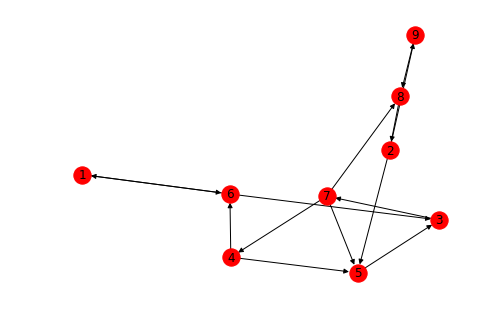

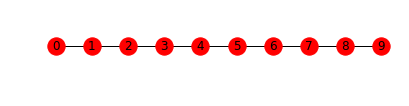

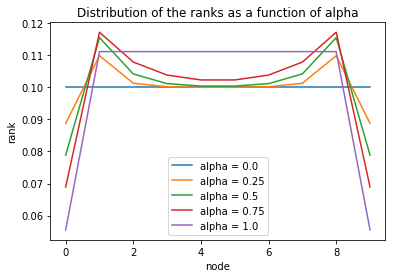

In [19]:
plt.figure(figsize=(6, 4))
plt.title('Distribution of the ranks as a function of alpha')
plt.xlabel('node')
plt.ylabel('rank')
for a in np.linspace(0, 1, 5):
    plt.plot(list(nx.pagerank(path_graph, alpha=a, max_iter=1000).values()), label='alpha = {}'.format(a))
plt.legend(loc='best')
plt.show()

## Les Misérables


In [20]:
miserables = nx.read_graphml("miserables.graphml", node_type = int)

In [21]:
names = nx.get_node_attributes(miserables, 'name')
weights = nx.get_edge_attributes(miserables, 'weight')
width = [weights[e] / 2 for e in miserables.edges()]

In [22]:
plt.figure(figsize = (8,8))
nx.draw(miserables, labels = names, width = width, edge_color = 'grey')

## To do

* List the 10 best ranked nodes of Les Misérables.
* Compare with the 10 nodes of highest degrees and the 10 nodes of highest weights.
* Try different values of $\alpha$ and interpret the results.

In [23]:
print('The 10 best ranked nodes are: \n')

top10_nodes = sorted(nx.pagerank(miserables).items(), key=operator.itemgetter(1), reverse=True)[:10]
pprint(list(map(lambda x : (miserables.nodes[x[0]]['name'], x[1]), top10_nodes)))

The 10 best ranked nodes are: 

[('Valjean', 0.09957628217876387),
 ('Marius', 0.0516656523530784),
 ('Myriel', 0.039250993615993414),
 ('Cosette', 0.03691400220269323),
 ('Enjolras', 0.036601919123326616),
 ('Thenardier', 0.035686585550664805),
 ('Courfeyrac', 0.03298332686163007),
 ('Gavroche', 0.02829329731121652),
 ('Fantine', 0.027165616008694403),
 ('Javert', 0.026825583087312484)]


In [24]:
degrees = dict(miserables.degree)
print('The 10 nodes of highest degrees are: \n')

ranked_degrees = sorted(degrees.items(), key=operator.itemgetter(1), reverse=True)[:10] 
pprint(list(map(lambda x : (miserables.nodes[x[0]]['name'], x[1]), ranked_degrees)))

The 10 nodes of highest degrees are: 

[('Valjean', 36),
 ('Gavroche', 22),
 ('Marius', 19),
 ('Javert', 17),
 ('Thenardier', 16),
 ('Fantine', 15),
 ('Enjolras', 15),
 ('Courfeyrac', 13),
 ('Bossuet', 13),
 ('Bahorel', 12)]


In [25]:
def get_weights(adjacency):
    n = adjacency.shape[0]
    return adjacency.dot(np.ones(n, dtype = int))

In [26]:
w = enumerate(get_weights(nx.to_scipy_sparse_matrix(miserables)))

weights = dict()

for idx, weight in w:
    weights[idx] = weight
    
print('The 10 nodes of highest weights are: \n')

ranked_weights = sorted(weights.items(), key=operator.itemgetter(1), reverse=True)[:10] 
pprint(list(map(lambda x : (miserables.nodes[x[0]]['name'], x[1]), ranked_weights)))

The 10 nodes of highest weights are: 

[('Valjean', 158),
 ('Marius', 104),
 ('Enjolras', 91),
 ('Courfeyrac', 84),
 ('Cosette', 68),
 ('Combeferre', 68),
 ('Bossuet', 66),
 ('Thenardier', 61),
 ('Gavroche', 56),
 ('Fantine', 47)]


## Openflights


In [27]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

In [28]:
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights}

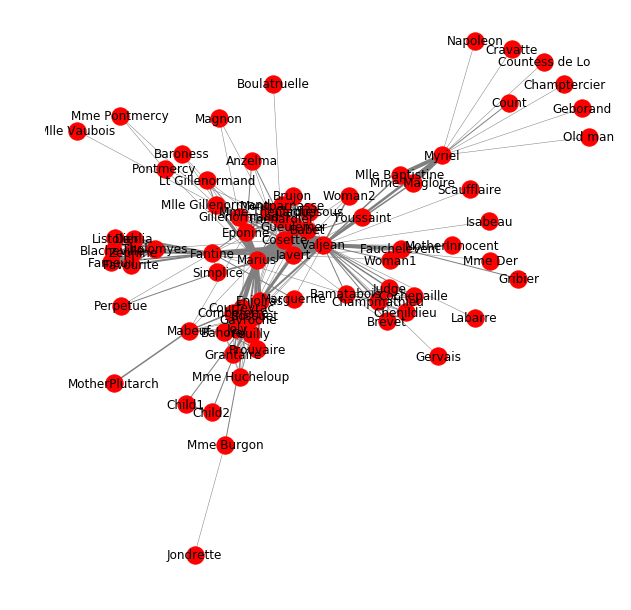

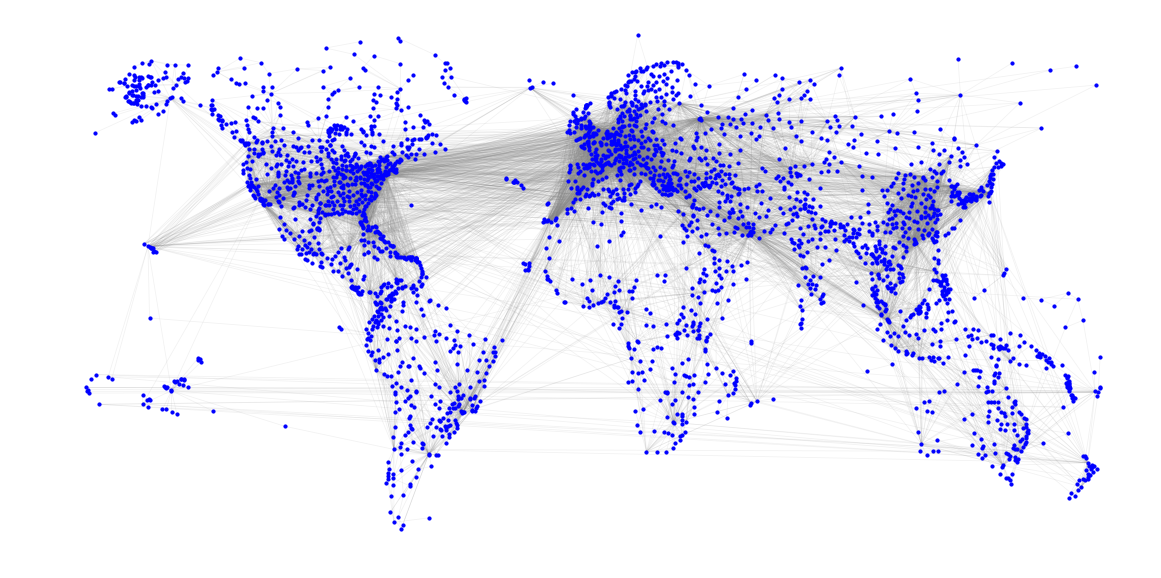

In [29]:
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_edges(openflights, pos, alpha = .1, width=.8, edge_color = 'grey')
plt.show()

## To do

* List and display the 10 best ranked airports.
* Compare with the 10 airports of highest traffic.

In [30]:
print('The 10 best ranked airports are: \n')

top10_airports = sorted(nx.pagerank(openflights).items(), key=operator.itemgetter(1), reverse=True)[:10] 
pprint(list(map(lambda x : (openflights.nodes[x[0]]['name'], x[1]), top10_airports)))

The 10 best ranked airports are: 

[('Hartsfield Jackson Atlanta International Airport', 0.005145403593166541),
 ('Dallas Fort Worth International Airport', 0.00472740026056956),
 ('Amsterdam Airport Schiphol', 0.004457275429288883),
 ("Chicago O'Hare International Airport", 0.004342573162802293),
 ('Denver International Airport', 0.004295311108107729),
 ('Charles de Gaulle International Airport', 0.004158427799666545),
 ('Atatürk International Airport', 0.003977465015359743),
 ('OR Tambo International Airport', 0.0038079835293439797),
 ('Los Angeles International Airport', 0.0038031273482594784),
 ('Domodedovo International Airport', 0.00379643421251896)]


In [31]:
w_airports = enumerate(get_weights(nx.to_scipy_sparse_matrix(openflights)))

weights_airports = dict()

for idx, weight in w_airports:
    weights_airports[idx] = weight
    
print('The 10 nodes of highest traffic are: \n')

top10_traffic = sorted(weights_airports.items(), key=operator.itemgetter(1), reverse=True)[:10] 
pprint(list(map(lambda x : (openflights.nodes[x[0]]['name'], x[1]), top10_traffic)))

The 10 nodes of highest traffic are: 

[('Amsterdam Airport Schiphol', 492),
 ('Charles de Gaulle International Airport', 413),
 ('Dublin Airport', 408),
 ('Munich International Airport', 386),
 ('Hartsfield Jackson Atlanta International Airport', 382),
 ('London Gatwick Airport', 376),
 ('Frankfurt am Main International Airport', 369),
 ('Atatürk International Airport', 354),
 ('Dallas Fort Worth International Airport', 334),
 ('Beijing Capital International Airport', 332)]


## Wikipedia for Schools

In [32]:
wikipedia = nx.read_graphml("wikipedia_schools.graphml", node_type = int)
wikipedia.name = 'Wikipedia for Schools'

## To do

* List the 10 best ranked pages of Wikipedia for Schools.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees.
* Which article of Wikipedia for School is in the top-10 in terms of PageRank but not in the top-10 in terms of in-degree?

In [33]:
print('The 10 best ranked pages of Wikipedia for Schools are: \n')

top10_pages = sorted(nx.pagerank(wikipedia).items(), key=operator.itemgetter(1), reverse=True)[:10] 
pprint(list(map(lambda x : (wikipedia.nodes[x[0]]['name'], x[1]), top10_pages)))

The 10 best ranked pages of Wikipedia for Schools are: 

[('United States', 0.00956607151876177),
 ('France', 0.006422592507473661),
 ('Europe', 0.006339657306010129),
 ('United Kingdom', 0.00623504934004644),
 ('English language', 0.004864986027022299),
 ('Germany', 0.004824155845362229),
 ('World War II', 0.004724450220056358),
 ('England', 0.0044743032210142735),
 ('Latin', 0.004424050210791028),
 ('India', 0.004035681392814871)]


In [34]:
out_degrees = list(enumerate(get_weights(nx.to_scipy_sparse_matrix(wikipedia, weight=None))))

print('The 10 nodes of highest out-degrees of Wikipedia for Schools are: \n')

top10_out_degrees = sorted(out_degrees, key=operator.itemgetter(1), reverse=True)[:10]
pprint(list(map(lambda x : (wikipedia.nodes[x[0]]['name'], x[1]), top10_out_degrees)))

The 10 nodes of highest out-degrees of Wikipedia for Schools are: 

[('United States', 294),
 ('Driving on the left or right', 255),
 ('List of countries', 244),
 ('List of circulating currencies', 236),
 ('List of sovereign states', 216),
 ('Africa', 212),
 ('List of countries by system of government', 207),
 ('Lebanon', 192),
 ('Interpol', 191),
 ('Armenia', 186)]


In [35]:
in_degrees = list(enumerate(get_weights(nx.to_scipy_sparse_matrix(wikipedia, weight=None).T)))

print('The 10 nodes of highest in-degrees of Wikipedia for Schools are: \n')

top10_in_degrees = sorted(in_degrees, key=operator.itemgetter(1), reverse=True)[:10]
pprint(list(map(lambda x : (wikipedia.nodes[x[0]]['name'], x[1]), top10_in_degrees)))

The 10 nodes of highest in-degrees of Wikipedia for Schools are: 

[('United States', 1551),
 ('United Kingdom', 972),
 ('France', 959),
 ('Europe', 933),
 ('World War II', 751),
 ('England', 751),
 ('Germany', 743),
 ('India', 611),
 ('English language', 598),
 ('London', 587)]


It is the page 'Latin'.

## 2. Personalized PageRank

The personalized PageRank provides local ranking with respect to some target node(s). 

## To do

Using the ```pagerank``` function of ```networkx```:
* List the 5 closest characters to **Cosette** in Les Miserables.
* List the 10 closest airports to **Charles de Gaulle** in Openflights.
* List the 20 closest pages to **Picasso** in Wikipedia for Schools. What is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia for Schools.
* List the 10 closest actors to **Marion Cotillard** in the Actors-Movies graph.

In [36]:
actors_movies = nx.read_graphml("actors_movies.graphml", node_type = int)

In [37]:
# Get nodes from string (case sensitive)
def get_node_from_string(graph, word):
    nodes = {}
    for u in graph:
        if graph.node[u]['name'].find(word) >= 0:
            nodes[u] = graph.node[u]['name']
    return nodes

In [38]:
# Sort a dictionary by values (decreasing order)
my_dict = {'a': 3, 'b': 8, 'c':1}
sorted(my_dict, key = my_dict.get, reverse = True)

['b', 'a', 'c']

In [39]:
def personalized_pagerank(graph, names, closest, neighbor_type, different_types):

    nodes = []
    for name in names:
        results_query = list(get_node_from_string(G, name).values())
        if name in results_query:
            node = list(get_node_from_string(G, name))[np.argwhere(np.array(results_query) == name)[0, 0]]
            nodes.append(node)
        else:
            nodes.append(list(get_node_from_string(G, name))[0])


    nb_names = len(names)
    personalization = []
    for u in G.nodes():
        if (u in nodes):
            personalization.append((u, 1 / nb_names))
        else:
            personalization.append((u, 0))


    personalization = dict(personalization)
    pagerank = sorted(nx.pagerank(G, personalization=personalization).items(), key=operator.itemgetter(1), reverse=True)

    for k in range(len(names)):
        del pagerank[0]

    # filter
    if (different_types):
        k = 0
        n = len(pagerank)
        while (k < n):
            if (G.nodes[pagerank[k][0]]['type'] != neighbor_type):
                del pagerank[k]
                n -= 1
            else:
                k += 1
    
    return pagerank

In [40]:
# infos
G = miserables.copy()
names = ['Cosette']
closest = 5
neighbor_type = 'character'
different_types = False


# personalized pagerank
pagerank = personalized_pagerank(G, names, closest, neighbor_type, different_types)


# results
print('The {} closest {}s to {} in {} are:\n'.format(closest, neighbor_type, ', '.join(names), G.name))
pprint(list(map(lambda x : (x[0], G.nodes[x[0]]['name'], x[1]), pagerank))[:closest])

The 5 closest characters to Cosette in Les Miserables are:

[(11, 'Valjean', 0.15001512556798233),
 (55, 'Marius', 0.09928905925063694),
 (25, 'Thenardier', 0.035848340561201696),
 (58, 'Enjolras', 0.03076643191042199),
 (27, 'Javert', 0.0293848167822739)]


In [41]:
# infos
G = openflights.copy()
names = ['Charles de Gaulle']
closest = 10
neighbor_type = 'airport'
different_types = False

# personalized pagerank
pagerank = personalized_pagerank(G, names, closest, neighbor_type, different_types)

# results
print('The {} closest {}s to {} in {} are:\n'.format(closest, neighbor_type, ', '.join(names), G.name))
pprint(list(map(lambda x : (x[0], G.nodes[x[0]]['name'], x[1]), pagerank))[:closest])

The 10 closest airports to Charles de Gaulle in Openflights are:

[(280, 'Amsterdam Airport Schiphol', 0.007783471190170047),
 (183, 'Brussels Airport', 0.00640892713798806),
 (194, 'Munich International Airport', 0.006300989932369418),
 (251, 'London Gatwick Airport', 0.006298967227618662),
 (762, 'Atatürk International Airport', 0.0060775729203760885),
 (286, 'Dublin Airport', 0.005952505787498728),
 (189, 'Frankfurt am Main International Airport', 0.005947401879773409),
 (564, 'Barcelona International Airport', 0.004819159668542008),
 (699, 'Leonardo da Vinci–Fiumicino Airport', 0.004776377088008445),
 (502, 'Addis Ababa Bole International Airport', 0.004642886306426803)]


In [42]:
# infos
G = wikipedia.copy()
names = ['Picasso']
closest = 20
neighbor_type = 'page'
different_types = False

# personalized pagerank
pagerank = personalized_pagerank(G, names, closest, neighbor_type, different_types)

# results
print('The {} closest {}s to {} in {} are:\n'.format(closest, neighbor_type, ', '.join(names), G.name))
pprint(list(map(lambda x : (x[0], G.nodes[x[0]]['name'], x[1]), pagerank))[:closest])

The 20 closest pages to Picasso in Wikipedia for Schools are:

[(38, 'France', 0.014235355148177944),
 (40, 'Germany', 0.012025388201103274),
 (31, 'World War II', 0.0116012290295659),
 (602, 'World War I', 0.011101931514288977),
 (98, 'Spain', 0.01079708820526127),
 (46, 'Paris', 0.010012974366911738),
 (121, 'Poland', 0.009764448843802521),
 (232, 'Art', 0.009069805203132403),
 (2130, 'Sculpture', 0.008916710238216368),
 (50, 'United States dollar', 0.00808436171501112),
 (2107, 'Neoclassicism', 0.007829089699984765),
 (1162, 'Chicago', 0.007823018426642611),
 (821, 'Madrid', 0.007803441359064105),
 (1843, 'Barcelona', 0.007639044580162011),
 (760, 'Fascism', 0.0075474343567553),
 (102, 'United States', 0.007501553684342383),
 (757, 'Cubism', 0.0074880528842814565),
 (2833, 'Paul McCartney', 0.007210945462616337),
 (3183, 'Henri Matisse', 0.0072046773393911415),
 (183, 'Europe', 0.006006168666936557)]


In [43]:
# infos
G = wikipedia.copy()
names = ['Cat', 'Dog']
closest = 20
neighbor_type = 'page'
different_types = False


# personalized pagerank
pagerank = personalized_pagerank(G, names, closest, neighbor_type, different_types)

# results
print('The {} closest {}s to {} in {} are:\n'.format(closest, neighbor_type, ', '.join(names), G.name))
pprint(list(map(lambda x : (x[0], G.nodes[x[0]]['name'], x[1]), pagerank))[:closest])

The 20 closest pages to Cat, Dog in Wikipedia for Schools are:

[(466, 'Animal', 0.00883023335409618),
 (1044, 'Scientific classification', 0.00795930076137549),
 (102, 'United States', 0.007272895042412954),
 (1040, 'Mammal', 0.007249707613790685),
 (1038, 'Chordate', 0.006318242075466015),
 (54, 'English language', 0.005451954276215336),
 (40, 'Germany', 0.0050001163908077),
 (1549, 'Insect', 0.004981162278638164),
 (183, 'Europe', 0.004897965822117865),
 (30, 'United Kingdom', 0.004731059236308883),
 (424, 'Africa', 0.004469249649543645),
 (1521, 'Bird', 0.004455469901481943),
 (38, 'France', 0.004449295503229965),
 (1012, 'Latin', 0.004199755039002363),
 (534, 'Evolution', 0.004173748371728191),
 (25, 'Russia', 0.00415004493415713),
 (157, 'North America', 0.004079435515592613),
 (385, 'Carolus Linnaeus', 0.003827391042669227),
 (1752, 'Retina', 0.0038038896596876916),
 (2681, 'Rabies', 0.003743953233495532)]


In [44]:
# infos
G = actors_movies.copy()
names = ['Marion Cotillard']
closest = 10
neighbor_type = 'actor'
different_types = True

# personalized pagerank
pagerank = personalized_pagerank(G, names, closest, neighbor_type, different_types)

# results
print('The {} closest {}s to {} in {} are:\n'.format(closest, neighbor_type, ', '.join(names), G.name))
pprint(list(map(lambda x : (x[0], G.nodes[x[0]]['name'], x[1]), pagerank))[:closest])

The 10 closest actors to Marion Cotillard in Actors-Movies are:

[(18515, 'Guillaume Canet', 0.007698261839375882),
 (24270, 'Frédéric Diefenthal', 0.004739587135352002),
 (39409, 'Samy Naceri', 0.004456099467799402),
 (8675, 'Anna Karina', 0.0035898375433741493),
 (69970, 'Bernard Farcy', 0.003263959515350119),
 (1314, 'Louis Garrel', 0.0031813606648099005),
 (11960, 'José Garcia (actor)', 0.002943896340045417),
 (68730, 'Fabrizio Rongione', 0.002911704290559844),
 (103569, 'Emma Wiklund', 0.0025115609994065037),
 (47843, 'Gilles Lellouche', 0.0024757620824465768)]


## 3. Sparse matrices

You will now implement your own PageRank algorithm using sparse matrices.

The Personalized PageRank vector $\pi$ follows from $N$ iterations of the update:
$$
\pi \gets \alpha  P^T \pi + (1-\alpha)\mu,
$$
where $P$ is the transition matrix of the random walk and $\mu$ the personalization vector (summing to 1) used to restart the random walk.

Note that $\mu$ is also:
* the initial value for $\pi$,
* the restart distribution in the presence of sinks (i.e., the corresponding rows of $P$ are taken equal to $\mu$)

## To do

* Write a function returning the transition matrix $P$ (pay attention to the sinks!)
* Write a function returning the vector $\pi$ after $N$ iterations of the update.
* Write your own pagerank function, with the same parameters as that of  ```networkx``` (see below).
* Compare your function to that of ```networkx``` on Wikipedia for Schools (results, speed).

In [45]:
def get_transition_matrix(adjacency, restart = None):
    '''
    adjacency: scipy CSR matrix
        adjacency matrix of the graph
    restart: numpy array summing to 1
        If None, set to uniform distribution.
    '''
    n = adjacency.shape[0]
    if restart is None:
        restart = np.ones(n) / n

    P = sp.csr_matrix((n,n))

    weights = get_weights(adjacency)
    P_classic = sp.diags(1 / (weights+1e-10)).dot(adjacency) # + 0.001 to allow the inversion

    for k in range(adjacency.shape[0]):
        if (weights[k] == 0):
            P[k] = restart
        else:
            P[k] = P_classic[k]

    return P

In [46]:
def get_pi(adjacency, restart = None, alpha = .85, N = 20):

    P = get_transition_matrix(adjacency, restart)

    restart = sp.csr_matrix(restart)
    pi = restart.copy()

    for k in range(N):
        pi = alpha * pi.dot(P) + (1 - alpha) * restart
    
    return pi.toarray()[0]

In [47]:
def pagerank(graph, alpha = 0.85, personalization = None, N = 20):
    '''
    graph: networkx Graph (or DiGraph)
        Graph
    alpha:
        damping factor    
    personalization: dictionary
        initial / restart distribution
    N: int
        number of iterations
    '''

    adjacency = nx.to_scipy_sparse_matrix(graph)
    n = adjacency.shape[0]

    if personalization is None:
        restart = np.ones(n) / n
    else:
        restart = np.zeros(n)
        
        for u in personalization.keys():
            restart[u] = personalization[u]
    
    
    pi = get_pi(adjacency, restart)
    
    pagerank = {u: pi[u] for u in graph.nodes()}
    
    return pagerank

In [48]:
import time

names = ['Cosette']
closest = 5
neighbor_type = 'character'

perso = {}
for u in miserables.nodes():
    if(miserables.node[u]['name'] == 'Cosette'):
        perso[u] = 1
    else:
        perso[u] = 0

t0 = time.time()
best_ranked = sorted(pagerank(miserables, personalization= perso).items(), key = lambda t: t[1], reverse=True)
del best_ranked[0]
t1 = time.time()

print('According to our function, the {} closest {}s to {} in {} are: (execution time: {})\n'.format(closest, 
                                                                                                     neighbor_type, 
                                                                                                     ', '.join(names), 
                                                                                                     miserables.name,
                                                                                                     t1 - t0))
pprint(list(map(lambda x : (x[0], miserables.nodes[x[0]]['name'], x[1]), best_ranked))[:closest])

t0 = time.time()
best_ranked = sorted(nx.pagerank(miserables, personalization= perso).items(), key = lambda t: t[1], reverse=True)
del best_ranked[0]
t1 = time.time()

print('\n')

print('According to networkx\'s function, the {} closest {}s to {} in {} are: (execution time: {})\n'.format(closest, 
                                                                                                     neighbor_type, 
                                                                                                     ', '.join(names), 
                                                                                                     miserables.name,
                                                                                                     t1 - t0))
pprint(list(map(lambda x : (x[0], miserables.nodes[x[0]]['name'], x[1]), best_ranked))[:closest])

According to our function, the 5 closest characters to Cosette in Les Miserables are: (execution time: 0.06298542022705078)

[(11, 'Valjean', 0.15006089781474416),
 (55, 'Marius', 0.099306713878206734),
 (25, 'Thenardier', 0.035871368424924575),
 (58, 'Enjolras', 0.030759667017132692),
 (27, 'Javert', 0.02939454618504498)]


According to networkx's function, the 5 closest characters to Cosette in Les Miserables are: (execution time: 0.03400921821594238)

[(11, 'Valjean', 0.15001512556798233),
 (55, 'Marius', 0.09928905925063694),
 (25, 'Thenardier', 0.035848340561201696),
 (58, 'Enjolras', 0.03076643191042199),
 (27, 'Javert', 0.0293848167822739)]


## 4. Forward-Backward PageRank

The forward-backward pagerank is based on a random walk following edges in forward and backward directions, alternately. The ranking may differ significantly in directed graphs. 

## To do
* Complete the functions below to get the (Personalized) Forward-Backward PageRank vector.
* What is the closest page to **Picasso** in Wikipedia for Schools for the Personalized Forward-Backward PageRank?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia for Schools for the Personalized Forward-Backward PageRank.

In [49]:
def forward_backward_pagerank(graph, alpha = 0.85, personalization = None, N = 20):
    '''
    graph: networkx Graph (or DiGraph)
        Graph 
    alpha:
        damping factor    
    personalization: dictionary
        initial / restart distribution
    N: int
        number of iterations
    '''
    adjacency = nx.to_scipy_sparse_matrix(graph)
    n = adjacency.shape[0]
    
    if personalization is None:
        restart = np.ones(n) / n
    else:
        restart = np.zeros(n)
        
        for u in personalization.keys():
            restart[u] = personalization[u]
    
    
    Pp = get_transition_matrix(adjacency, restart)
    Pm = get_transition_matrix(adjacency.T, restart)
    
    restart = sp.csr_matrix(restart)
    pi = restart

    for k in range(N):
        pi = pi.dot(Pp)
        pi = alpha * pi.dot(Pm) + (1 - alpha) * restart

    pi = pi.toarray()[0]
    
    pagerank = {u: pi[u] for u in graph.nodes()}
    
    return pagerank

In [50]:
# infos
G = wikipedia.copy()
names = ['Picasso']
closest = 5
neighbor_type = 'page'


nodes = []
for name in names:
    results_query = list(get_node_from_string(G, name).values())
    if name in results_query:
        node = list(get_node_from_string(G, name))[np.argwhere(np.array(results_query) == name)[0, 0]]
        nodes.append(node)
    else:
        nodes.append(list(get_node_from_string(G, name))[0])


nb_names = len(names)
personalization = []
for u in G.nodes():
    if (u in nodes):
        personalization.append((u, 1 / nb_names))
    else:
        personalization.append((u, 0))


personalization = dict(personalization)

pagerank = sorted(forward_backward_pagerank(G, personalization=personalization).items(), key=operator.itemgetter(1), reverse=True)


# results
print('The closest {} to {} in {} are:\n'.format(neighbor_type, ', '.join(names), G.name))
pprint(list(map(lambda x : (x[0], G.nodes[x[0]]['name'], x[1]), pagerank))[:closest])

The closest page to Picasso in Wikipedia for Schools are:

[(1185, 'Pablo Picasso', 0.15323855118756358),
 (4077, 'History of painting', 0.0031312734823653638),
 (4078, 'Western painting', 0.002578382312055144),
 (102, 'United States', 0.0019464829984564439),
 (1154, 'Bucharest', 0.0016269958457237801)]
